In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-evd-bauerfike)


We first define a hermitian matrix. Note that we add the *conjugate* transpose of a matrix to itself.

In [2]:
n = 7
A = random.randn(n, n) + 1j * random.randn(n, n)
A = (A + conj(A.T)) / 2

```{index} Python; cond
```

We confirm that the matrix $\mathbf{A}$ is normal by checking that $\kappa(\mathbf{V}) = 1$ (to within roundoff).

In [3]:
from numpy.linalg import eig, cond
d, V = eig(A)
print(f"eigenvector matrix has condition number {cond(V):.5f}")

eigenvector matrix has condition number 1.00000


Now we perturb $\mathbf{A}$ and measure the effect on the eigenvalues. Note that the Bauer–Fike theorem uses absolute differences, not relative ones. Since the ordering of eigenvalues can change, we look at all pairwise differences and take the minima.

In [4]:
E = random.randn(n, n) + 1j * random.randn(n, n)
E = 1e-8 * E / norm(E, 2)
dd, _ = eig(A + E)
dist = array([min([abs(x - y) for x in dd]) for y in d])
print(dist)

[2.61227484e-09 3.05959487e-09 2.66433126e-09 2.64200133e-09
 1.76157014e-09 1.14083548e-09 5.98333817e-10]


As promised, the perturbations in the eigenvalues do not exceed the normwise perturbation to the original matrix.

Now we see what happens for a triangular matrix.

In [5]:
n = 20
x = arange(n) + 1
A = triu(outer(x, ones(n)))
print(A[:5, :5])

[[1. 1. 1. 1. 1.]
 [0. 2. 2. 2. 2.]
 [0. 0. 3. 3. 3.]
 [0. 0. 0. 4. 4.]
 [0. 0. 0. 0. 5.]]


This matrix is not at all close to normal.

In [6]:
d, V = eig(A)
print(f"eigenvector matrix has condition number {cond(V):.2e}")

eigenvector matrix has condition number 6.15e+09


As a result, the eigenvalues can change by a good deal more.

In [7]:
E = random.randn(n, n) + 1j * random.randn(n, n)
E = 1e-8 * E / norm(E, 2)
dd, _ = eig(A + E)
dist = array([min([abs(x - y) for x in dd]) for y in d])
print(f"Maximum eigenvalue change is {max(dist):.2e}")
print(f"The Bauer-Fike upper bound is {cond(V) * norm(E, 2):.2e}")

Maximum eigenvalue change is 5.40e-01
The Bauer-Fike upper bound is 6.15e+01


If we plot the eigenvalues of many perturbations, we get a cloud of points that roughly represents all the possible eigenvalues when representing this matrix with single-precision accuracy.

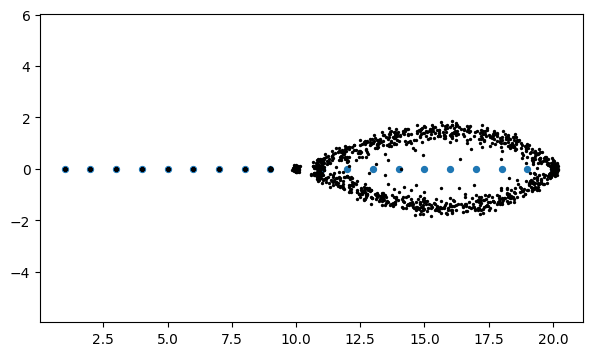

In [8]:
clf
scatter(d, zeros(n), 18)
axis("equal") 
for _ in range(100):
    E = random.randn(n, n) + 1j * random.randn(n, n)
    E = finfo(np.float32).eps * E / norm(E, 2)
    dd, _ = eig(A + E)
    scatter(real(dd), imag(dd), 2, 'k')

The plot shows that some eigenvalues are much more affected than others. This situation is not unusual, but it is not explained by the Bauer–Fike theorem.